**Mini-Projeto: Análise da População Brasileira**

**Objetivo:**

Analisar a evolução da população brasileira ao longo dos anos e explorar características demográficas básicas, como a distribuição por região e o crescimento populacional.

**Passos do Projeto:**

1. Coleta dos Dados
Para esse mini-projeto, vamos simular que temos um arquivo CSV chamado populacao_brasil.csv, que contém dados de população por ano, região e sexo.

In [ ]:
import pandas as pd

# Carregando os dados
df = pd.read_csv('populacao_brasil.csv')

# Exibindo as primeiras linhas do DataFrame
print(df.head())


    Ano    Regiao       Sexo  Populacao
0  2000     Norte  Masculino    7000000
1  2000     Norte   Feminino    6800000
2  2000  Nordeste  Masculino   25000000
3  2000  Nordeste   Feminino   26000000
4  2000       Sul  Masculino   14500000


**3. Limpeza e Preparação dos Dados**

Verificaremos se há dados faltantes e faremos qualquer outra limpeza necessária.

In [ ]:
# Verificando dados faltantes
print(df.isnull().sum())

# Verificando tipos de dados
print(df.dtypes)

# Convertendo a coluna 'Ano' para datetime
df['Ano'] = pd.to_datetime(df['Ano'], format='%Y')

# Conferindo a mudança
print(df.head())


Ano          0
Regiao       0
Sexo         0
Populacao    0
dtype: int64
Ano           int64
Regiao       object
Sexo         object
Populacao     int64
dtype: object
         Ano    Regiao       Sexo  Populacao
0 2000-01-01     Norte  Masculino    7000000
1 2000-01-01     Norte   Feminino    6800000
2 2000-01-01  Nordeste  Masculino   25000000
3 2000-01-01  Nordeste   Feminino   26000000
4 2000-01-01       Sul  Masculino   14500000


**4. Análise Exploratória dos Dados (EDA)**

Agora, vamos realizar algumas análises básicas para entender melhor os dados.

**Distribuição Populacional por Região e Ano**

Vamos criar gráficos para visualizar a distribuição populacional por região ao longo dos anos.

<Axes: title={'center': 'Evolução da População Brasileira por Região (2000-2020)'}, xlabel='Ano', ylabel='População'>

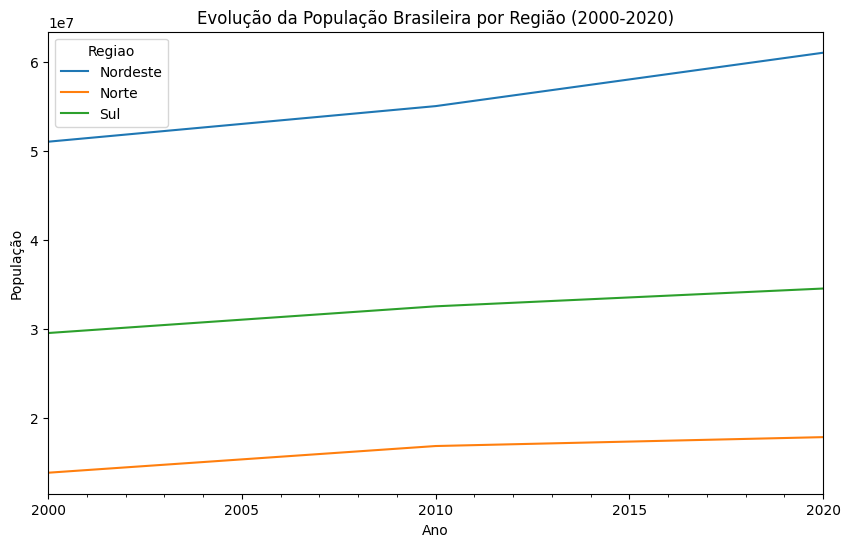

In [ ]:
# Agrupando os dados por Ano e Região e somando a população
df_grouped = df.groupby(['Ano', 'Regiao'])['Populacao'].sum().unstack()

# Plotando a evolução da população por região usando pandas
df_grouped.plot(kind='line', figsize=(10, 6), title='Evolução da População Brasileira por Região (2000-2020)', ylabel='População', xlabel='Ano')

# Explicação:
# 1. O comando df.groupby(['Ano', 'Regiao']) agrupa os dados pelas colunas 'Ano' e 'Regiao'.
# 2. A seguir, selecionamos a coluna 'Populacao' para somar os valores de população em cada grupo.
# 3. O método .sum() calcula a soma das populações para cada combinação de ano e região.
# 4. O método .unstack() reorganiza os dados para que a coluna 'Regiao' se torne as colunas do DataFrame,
#    com cada região tendo uma coluna separada, enquanto 'Ano' se torna o índice (linhas).
#
# O gráfico de linha resultante mostra a evolução da população ao longo do tempo para cada região,
# com o eixo x representando os anos e o eixo y representando a população em cada região.


**Distribuição por Sexo em 2020**

Vamos analisar como a população estava distribuída entre homens e mulheres em 2020.

<Axes: title={'center': 'Distribuição Populacional por Sexo nas Regiões (2020)'}, xlabel='Região', ylabel='População'>

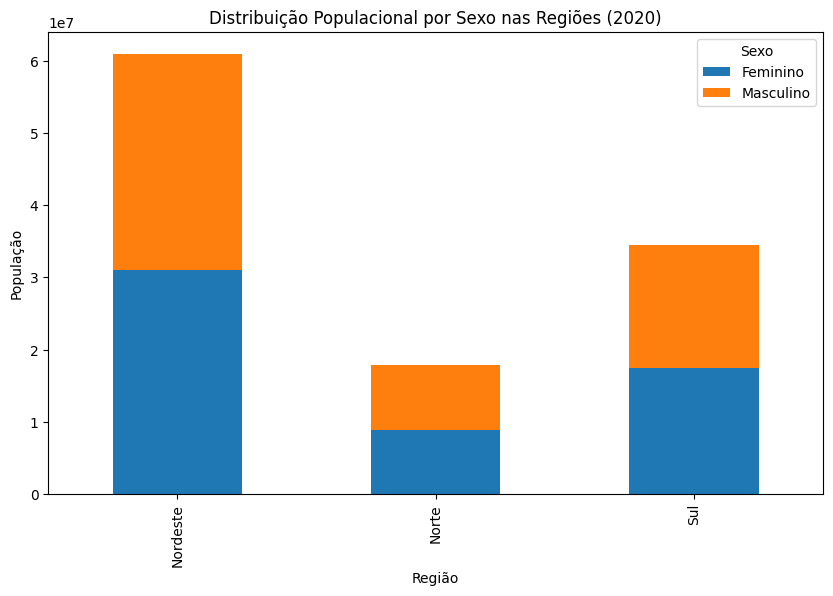

In [ ]:
# Filtrando dados de 2020
df_2020 = df[df['Ano'] == pd.to_datetime('2020')]  # Mudamos o valor '2020' para um valor datetime

# Agrupando por Região e Sexo
df_2020_grouped = df_2020.groupby(['Regiao', 'Sexo'])['Populacao'].sum().unstack()

# Plotando a distribuição por sexo usando pandas
df_2020_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), title='Distribuição Populacional por Sexo nas Regiões (2020)', ylabel='População', xlabel='Região')

# Explicação:
# 1. df[df['Ano'] == pd.to_datetime('2020')]:
#    Este comando filtra o DataFrame original (df) para incluir apenas os dados do ano 2020.
#    A diferença aqui é que usamos pd.to_datetime('2020') para converter o valor '2020' em um objeto datetime.
#    Isso garante que a coluna 'Ano' seja comparada corretamente, mesmo que os valores em 'Ano' sejam datetime.
#
# 2. df_2020.groupby(['Regiao', 'Sexo'])['Populacao'].sum():
#    Após filtrar os dados, agrupamos as informações por 'Regiao' e 'Sexo', o que significa que para cada região e sexo,
#    os valores de população serão somados. Estamos focando na coluna 'Populacao', e a função .sum() soma os valores
#    de cada grupo.
#
# 3. .unstack():
#    Esse método reorganiza os dados resultantes, transformando os valores de 'Sexo' em colunas, mantendo as regiões como
#    índices (linhas). Dessa forma, o DataFrame resultante terá uma linha para cada região e colunas separadas para 'Masculino'
#    e 'Feminino'.
#
# 4. df_2020_grouped.plot(kind='bar', stacked=True):
#    Este comando cria um gráfico de barras empilhadas. Cada barra representa a população total de uma região,
#    com as partes empilhadas representando a população masculina e feminina.
#
# 5. figsize=(10, 6):
#    Define o tamanho da figura do gráfico em 10 polegadas de largura e 6 polegadas de altura.
#
# 6. title='Distribuição Populacional por Sexo nas Regiões (2020)':
#    Define o título do gráfico, que aparecerá na parte superior da visualização.
#
# 7. ylabel='População':
#    Define o rótulo do eixo y (vertical), indicando que o eixo mostra valores de população.
#
# 8. xlabel='Região':
#    Define o rótulo do eixo x (horizontal), mostrando que as barras no gráfico representam diferentes regiões do Brasil.
#
# O gráfico resultante mostra a distribuição da população entre homens e mulheres em cada região brasileira no ano de 2020.
# As barras empilhadas ajudam a visualizar a população total em cada região e as proporções de população masculina e feminina.


**5. Insights**

Baseado nos gráficos gerados, podemos tirar alguns insights:

*   Crescimento Regional: É possível observar qual região teve o maior Crescimento populacional ao longo dos anos.
*   Distribuição por Sexo: Analisar se existe uma diferença significativa na população masculina e feminina nas diferentes regiões em 2020.

**6. Conclusão**

Por fim, podemos concluir nossa análise discutindo como os dados refletem as mudanças demográficas no Brasil ao longo dos anos.

**7. Exportação dos Resultados**

Caso seja necessário, podemos exportar os dados tratados ou qualquer outro resultado para um novo arquivo CSV ou Excel.

In [ ]:
# Salvando os dados agrupados de 2020
df_2020_grouped.to_csv('distribuicao_populacao_2020.csv')
